<a href="https://colab.research.google.com/github/MasterMalcolm/AI-Portfolio-Malcolm-Richardson/blob/main/L06_Malcolm_Richardson_ITAI1378.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 06: Object Detection with Transfer Learning

Welcome to Lab 06! In this lab, we will transition from image classification to the more complex task of **object detection**. Object detection not only involves identifying objects in an image but also locating them with bounding boxes.

**What you'll learn:**
- How object detection differs from image classification
- How to work with bounding boxes
- How to use a pre-trained model for object detection
- How to evaluate object detection performance

**Don't worry if you're still learning Python!** This lab includes lots of hints, examples, and explanations to help you along the way.

## Learning Objectives

By the end of this lab, you will be able to:

- **Understand the fundamentals of object detection** and how it differs from image classification.
- **Load and explore** an object detection dataset, including images and bounding box annotations.
- **Implement key data preprocessing steps** for object detection tasks.
- **Use a pre-trained object detection model** for inference.
- **Visualize detection results** by drawing bounding boxes on images.
- **Implement and understand evaluation metrics** like Intersection over Union (IoU), precision, and recall.
- **Analyze and interpret** the performance of an object detection model.

## 1. Setup and Installation

Before we begin, we need to set up our environment. This involves installing the necessary Python libraries and ensuring we have access to a GPU for faster computation.

### What are these libraries?
- **TensorFlow**: The deep learning framework we'll use
- **TensorFlow Hub**: Provides pre-trained models
- **TensorFlow Datasets**: Easy access to common datasets
- **Matplotlib**: For creating visualizations

In [1]:
# Install required libraries
# The %pip command installs packages in Jupyter notebooks
%pip install tensorflow tensorflow-hub tensorflow-datasets matplotlib

Now, let's import the libraries we'll be using throughout the lab.

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.19.0
TensorFlow Hub version: 0.16.1


## 2. Understanding Object Detection

### What is Object Detection?

**Image Classification** answers: "What is in this image?" (e.g., "This is a cat")

**Object Detection** answers: "What is in this image and where is it?" (e.g., "There is a cat at position (100, 50) to (300, 200)")

### What is a Bounding Box?

A **bounding box** is a rectangle that surrounds an object in an image. It's defined by 4 numbers:
- **ymin**: Top edge of the box (as a fraction of image height)
- **xmin**: Left edge of the box (as a fraction of image width)
- **ymax**: Bottom edge of the box (as a fraction of image height)
- **xmax**: Right edge of the box (as a fraction of image width)

**Example:** If a bounding box is [0.2, 0.1, 0.8, 0.5], it means:
- Top edge is at 20% of the image height
- Left edge is at 10% of the image width
- Bottom edge is at 80% of the image height
- Right edge is at 50% of the image width

## 3. Data Loading and Exploration

We will be using the **Pascal VOC 2007 dataset**, a popular benchmark for object detection. This dataset contains images of everyday objects like people, cars, dogs, cats, etc.

### About the Dataset:
- **20 object classes**: person, car, dog, cat, bird, etc.
- **Images with annotations**: Each image has bounding boxes and labels for all objects
- **We're using 10% of the data**: To keep computation manageable

In [3]:
# Load the train and validation datasets
# split="train[:10%]" means we're only loading 10% of the training data
train_dataset, train_info = tfds.load("voc/2007", split="train[:10%]", with_info=True)
validation_dataset, validation_info = tfds.load("voc/2007", split="validation[:10%]", with_info=True)

# Get the class names (the types of objects the dataset contains)
class_names = train_info.features["objects"]["label"].names
print("Class names:", class_names)
print("\nNumber of classes:", len(class_names))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/voc/2007/incomplete.6ZQU1P_5.0.0/voc-test.tfrecord*...:   0%|          | 0…

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/voc/2007/incomplete.6ZQU1P_5.0.0/voc-train.tfrecord*...:   0%|          | …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/voc/2007/incomplete.6ZQU1P_5.0.0/voc-validation.tfrecord*...:   0%|       …

Dataset voc downloaded and prepared to /root/tensorflow_datasets/voc/2007/5.0.0. Subsequent calls will reuse this data.
Class names: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

Number of classes: 20


### Your Turn: Visualize the Data

Let's display some images from the dataset along with their **ground truth** bounding boxes. Ground truth means the correct, human-labeled boxes.

**Your Task:** Complete the function below to draw bounding boxes on images.

### Python Concepts You'll Use:
- **For loops**: `for item in list:` to iterate through items
- **Indexing**: `example["objects"]["bbox"]` to access nested data
- **Matplotlib**: Library for creating visualizations

### Step-by-Step Guide:
1. Get the bounding boxes from the example
2. Loop through each bounding box
3. Extract the coordinates (ymin, xmin, ymax, xmax)
4. Scale the coordinates by the image size
5. Draw a rectangle using matplotlib

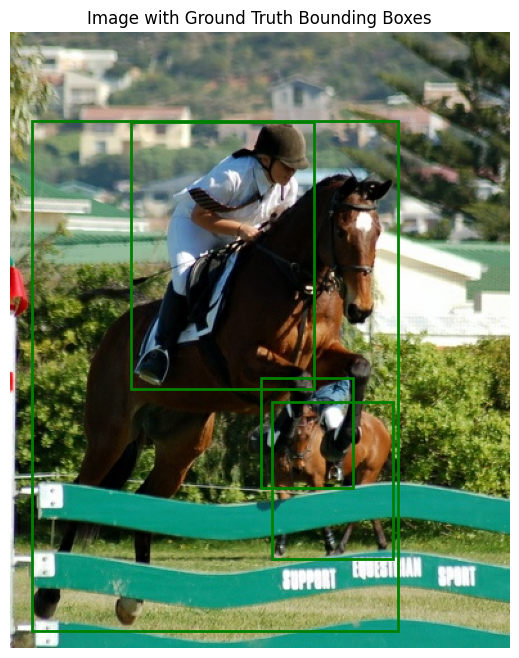

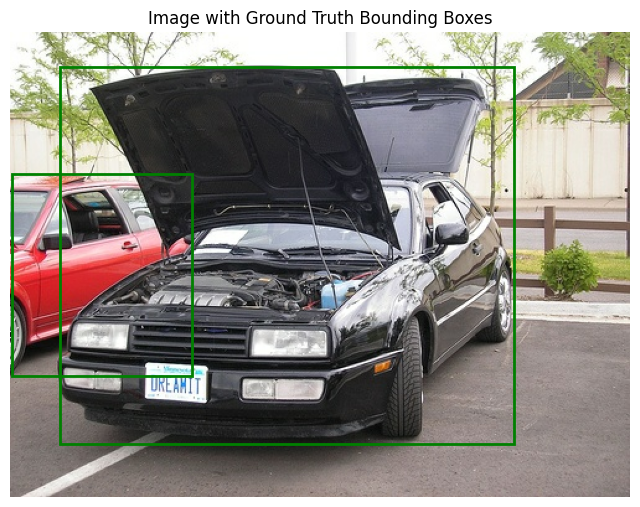

In [4]:
def display_examples(dataset, n=3):
    """Display n images from the dataset with their ground truth bounding boxes."""

    for example in dataset.take(n):
        image = example["image"]
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.title("Image with Ground Truth Bounding Boxes")

        # Get the image dimensions (height and width)
        img_height = image.shape[0]  # Number of pixels in height
        img_width = image.shape[1]   # Number of pixels in width

        # Your Task: Draw ground truth boxes on the image
        # STEP 1: Get the bounding boxes from the example
        # HINT: Use example["objects"]["bbox"] to get all bounding boxes
        boxes = example["objects"]["bbox"]  # TODO: Uncomment this line

        # STEP 2: Loop through each bounding box
        for box in boxes:  # TODO: Complete this line
            # STEP 3: Extract the coordinates
            # Remember: box format is [ymin, xmin, ymax, xmax]
            ymin, xmin, ymax, xmax = box  # TODO: Uncomment this line

            # STEP 4: Scale the coordinates by the image dimensions
            # The coordinates are fractions (0 to 1), so multiply by image size
            # Example: If xmin = 0.5 and img_width = 400, then x_pixel = 0.5 * 400 = 200
            x_pixel = xmin * img_width   # TODO: Uncomment this line
            y_pixel = ymin * img_height  # TODO: Uncomment this line
            width_pixel = (xmax - xmin) * img_width   # TODO: Uncomment this line
            height_pixel = (ymax - ymin) * img_height # TODO: Uncomment this line

            # STEP 5: Draw the rectangle
            # patches.Rectangle needs: (x, y), width, height
            rect = patches.Rectangle(
                (x_pixel, y_pixel),           # Bottom-left corner
                width_pixel,                   # Width of the box
                height_pixel,                  # Height of the box
                linewidth=2,                   # Thickness of the line
                edgecolor='green',             # Color of the box
                facecolor='none'               # No fill, just the outline
            )
            # Add the rectangle to the plot
            plt.gca().add_patch(rect)  # TODO: Uncomment this line

        plt.axis('off')  # Hide the axes for cleaner visualization
        plt.show()

# Test your function!
display_examples(train_dataset, n=2)

**Expected Output:** You should see 2 images with green rectangles around the objects.

**Troubleshooting:**
- If you don't see boxes, make sure you uncommented the TODO lines
- If boxes are in the wrong place, check your multiplication (coordinates × image dimensions)
- If you get an error, read the error message carefully - it often tells you what's wrong!

## 4. Loading a Pre-trained Model

We will use a pre-trained **SSD MobileNet V2** model from TensorFlow Hub.

### What does "pre-trained" mean?
- The model has already been trained on millions of images
- We don't need to train it ourselves (which would take days!)
- We can use it right away for object detection

### Why SSD MobileNet V2?
- **SSD** (Single Shot Detector): Fast object detection method
- **MobileNet**: Lightweight model that works on devices with limited resources
- **V2**: Version 2, an improved version of the original

In [5]:
# Load the pre-trained model from TensorFlow Hub
print("Loading model... (this may take a minute)")
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")
print("Model loaded successfully!")

Loading model... (this may take a minute)
Model loaded successfully!


## 5. Running the Detector

Now let's use the model to detect objects in images!

### How does the model work?
1. **Input**: An image (as a tensor)
2. **Processing**: The model analyzes the image
3. **Output**: A dictionary containing:
   - **detection_boxes**: Where objects are located
   - **detection_classes**: What type of object (person, car, etc.)
   - **detection_scores**: How confident the model is (0 to 1)

### Your Task: Complete the detector function

**Python Concepts:**
- **Data type conversion**: Changing data from one format to another
- **Tensor operations**: TensorFlow's way of handling arrays
- **Dictionary comprehension**: Creating dictionaries efficiently

In [6]:
def run_detector(detector, image):
    """Run the object detection model on an image.

    Args:
        detector: The pre-trained model
        image: The input image (as a numpy array or tensor)

    Returns:
        A dictionary with detection results
    """

    # STEP 1: Convert the image to the correct data type (uint8)
    # Why? The model expects pixel values as integers from 0-255
    # HINT: Use tf.image.convert_image_dtype(image, tf.uint8)
    converted_img = tf.image.convert_image_dtype(image, tf.uint8)

    # STEP 2: Add a batch dimension
    # Why? The model expects a batch of images, even if we only have one
    # HINT: Use [tf.newaxis, ...] to add a dimension at the beginning
    # Example: If image shape is (300, 400, 3), we want (1, 300, 400, 3)
    converted_img = converted_img[tf.newaxis, ...]

    # STEP 3: Run the detector
    # This is where the magic happens! The model analyzes the image.
    result = detector(converted_img)

    # STEP 4: Convert the output tensors to numpy arrays
    # Why? Numpy arrays are easier to work with in Python
    # HINT: Use a dictionary comprehension: {key: value.numpy() for key, value in result.items()}
    result = {key: value.numpy() for key, value in result.items()}

    return result

# Test your function with an example
print("Testing the detector...")
for example in train_dataset.take(1):
    image = example["image"]
    detections = run_detector(detector, image)
    print("\nDetection results contain:")
    for key in detections.keys():
        print(f"  - {key}: shape {detections[key].shape}")

Testing the detector...

Detection results contain:
  - raw_detection_boxes: shape (1, 1917, 4)
  - detection_multiclass_scores: shape (1, 100, 91)
  - detection_classes: shape (1, 100)
  - detection_boxes: shape (1, 100, 4)
  - raw_detection_scores: shape (1, 1917, 91)
  - num_detections: shape (1,)
  - detection_anchor_indices: shape (1, 100)
  - detection_scores: shape (1, 100)


**Expected Output:** You should see a list of detection result keys like:
- detection_boxes
- detection_classes
- detection_scores

**Understanding the Output:**
- If you see `shape (1, 100, 4)` for boxes, it means: 1 image, up to 100 detections, 4 coordinates per box
- The model always returns 100 detections, but most have very low scores (not confident)

## 6. Visualizing Detections

Now let's visualize what the model detected! We'll draw bounding boxes around the detected objects.

### Key Concept: Confidence Threshold
The model gives each detection a **confidence score** from 0 to 1:
- **1.0** = 100% confident
- **0.5** = 50% confident
- **0.1** = 10% confident

We only show detections above a certain threshold (e.g., 0.5) to avoid showing uncertain predictions.

### Your Task: Complete the visualization function

**Python Concepts:**
- **Enumerate**: `for i, item in enumerate(list):` gives you both index and item
- **Conditional statements**: `if score > threshold:` to filter results
- **String formatting**: `f"{label}: {score:.2f}"` to create nice labels

Running detection and visualization...


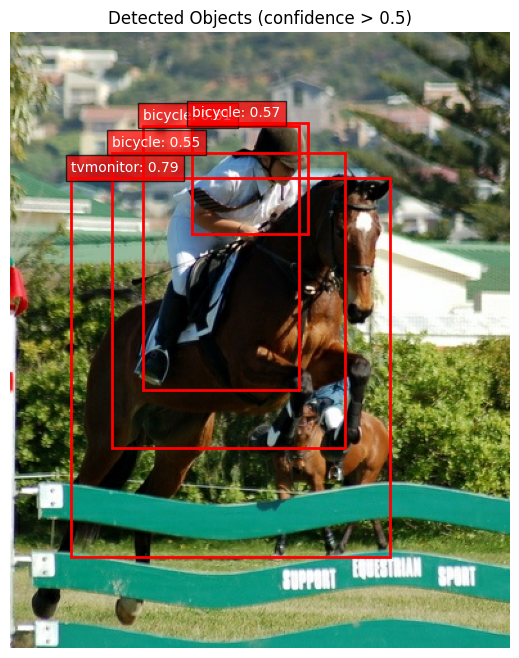

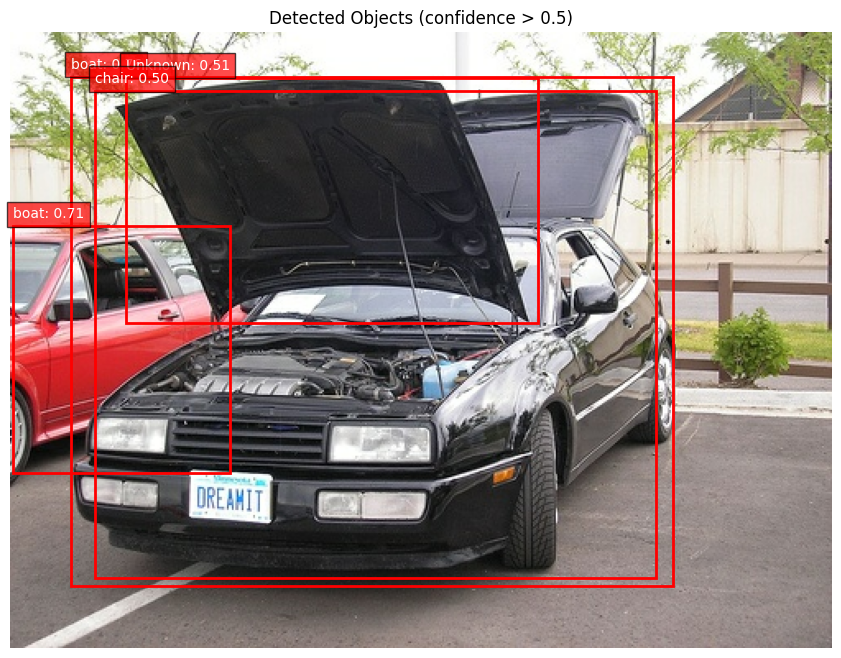

In [7]:
def plot_detections(image, detections, class_names, threshold=0.5):
    """Display the image with detected objects and their bounding boxes.

    Args:
        image: The input image
        detections: Dictionary with detection results from the model
        class_names: List of object class names
        threshold: Minimum confidence score to display (default 0.5)
    """

    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.title(f"Detected Objects (confidence > {threshold})")

    # Get image dimensions
    img_height = image.shape[0]
    img_width = image.shape[1]

    # Extract detection results
    # [0] is needed because the model returns results for a batch, we only have 1 image
    boxes = detections['detection_boxes'][0]
    classes = detections['detection_classes'][0]
    scores = detections['detection_scores'][0]

    # STEP 1: Loop through all detections
    # HINT: Use enumerate to get both the index (i) and the score
    for i, score in enumerate(scores):

        # STEP 2: Filter by confidence threshold
        # Only show detections where the model is confident enough
        if score < threshold:
            continue  # Skip this detection and move to the next one

        # STEP 3: Get the bounding box coordinates
        # Remember: boxes are in format [ymin, xmin, ymax, xmax]
        ymin, xmin, ymax, xmax = boxes[i]

        # STEP 4: Get the class ID and label
        class_id = int(classes[i])

        # Handle cases where class_id is outside our class_names list
        if class_id < len(class_names):
            label = class_names[class_id]
        else:
            label = "Unknown"

        # STEP 5: Scale coordinates to pixel values
        x_pixel = xmin * img_width
        y_pixel = ymin * img_height
        width_pixel = (xmax - xmin) * img_width
        height_pixel = (ymax - ymin) * img_height

        # STEP 6: Draw the bounding box
        rect = patches.Rectangle(
            (x_pixel, y_pixel),
            width_pixel,
            height_pixel,
            linewidth=2,
            edgecolor='red',      # Red for predictions (vs green for ground truth)
            facecolor='none'
        )
        plt.gca().add_patch(rect)

        # STEP 7: Add a label with the class name and confidence score
        # HINT: Use f"{label}: {score:.2f}" to format the text
        # .2f means show 2 decimal places
        label_text = f"{label}: {score:.2f}"

        # Draw the text above the bounding box
        plt.text(
            x_pixel,
            y_pixel - 5,           # Slightly above the box
            label_text,
            color='white',
            fontsize=10,
            bbox=dict(facecolor='red', alpha=0.7)  # Red background for visibility
        )

    plt.axis('off')
    plt.show()

# Test your function!
print("Running detection and visualization...")
for example in train_dataset.take(2):
    image = example["image"]
    detections = run_detector(detector, image)
    plot_detections(image, detections, class_names)

**Expected Output:** You should see 2 images with red bounding boxes around detected objects, with labels showing the object type and confidence score.

**Things to Notice:**
- Some objects might be detected correctly
- Some might be missed (false negatives)
- Some boxes might be in the wrong place or wrong class (false positives)
- This is normal! No model is perfect.

## 7. Evaluation Metrics

How do we measure if our object detection model is good? We need metrics!

### Key Concept: Intersection over Union (IoU)

IoU measures how well a predicted bounding box matches the ground truth box.

**Formula:** IoU = (Area of Overlap) / (Area of Union)

**Visual Example:**
```
Ground Truth Box:  [====]
Predicted Box:       [====]
Overlap:             [==]
Union:             [======]

IoU = Area of [==] / Area of [======]
```

**Interpreting IoU:**
- **IoU = 1.0**: Perfect match! Boxes are identical
- **IoU = 0.5**: Decent match, boxes overlap 50%
- **IoU = 0.0**: No overlap at all

**Common threshold:** IoU > 0.5 is considered a "correct" detection

### Your Task: Implement IoU Calculation

**Python Concepts:**
- **max() and min()**: Find maximum or minimum of numbers
- **Arithmetic operations**: +, -, *, /
- **Conditional expressions**: Handle edge cases

In [8]:
def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) between two bounding boxes.

    Args:
        box1: First box in format [ymin, xmin, ymax, xmax]
        box2: Second box in format [ymin, xmin, ymax, xmax]

    Returns:
        IoU value between 0 and 1
    """

    # STEP 1: Find the intersection rectangle
    # The intersection is where the two boxes overlap
    # Top-left corner: take the MAXIMUM of the top-left corners
    # Bottom-right corner: take the MINIMUM of the bottom-right corners

    # HINT: box1[0] is ymin of box1, box2[0] is ymin of box2
    inter_ymin = max(box1[0], box2[0])
    inter_xmin = max(box1[1], box2[1])
    inter_ymax = min(box1[2], box2[2])
    inter_xmax = min(box1[3], box2[3])

    # STEP 2: Calculate the intersection area
    # Width = xmax - xmin, Height = ymax - ymin
    # Area = width * height
    # BUT: If boxes don't overlap, width or height will be negative!
    # Use max(0, ...) to handle this case

    inter_width = max(0, inter_xmax - inter_xmin)
    inter_height = max(0, inter_ymax - inter_ymin)
    inter_area = inter_width * inter_height

    # STEP 3: Calculate the area of each bounding box
    # Formula: (xmax - xmin) * (ymax - ymin)

    box1_area = (box1[3] - box1[1]) * (box1[2] - box1[0])
    box2_area = (box2[3] - box2[1]) * (box2[2] - box2[0])

    # STEP 4: Calculate the union area
    # Union = Area of box1 + Area of box2 - Intersection area
    # (We subtract intersection because it's counted twice)

    union_area = box1_area + box2_area - inter_area

    # STEP 5: Calculate IoU
    # IoU = Intersection / Union
    # Handle division by zero: if union_area is 0, return 0

    if union_area == 0:
        return 0.0

    iou = inter_area / union_area
    return iou

# Test your function with example boxes
print("Testing IoU calculation...\n")

# Test 1: Identical boxes (should give IoU = 1.0)
box1 = [0.1, 0.1, 0.5, 0.5]
box2 = [0.1, 0.1, 0.5, 0.5]
iou = calculate_iou(box1, box2)
print(f"Test 1 - Identical boxes: IoU = {iou:.4f} (expected: 1.0000)")

# Test 2: Overlapping boxes (should give IoU around 0.14)
box1 = [0.1, 0.1, 0.5, 0.5]
box2 = [0.3, 0.3, 0.7, 0.7]
iou = calculate_iou(box1, box2)
print(f"Test 2 - Overlapping boxes: IoU = {iou:.4f} (expected: ~0.14)")

# Test 3: Non-overlapping boxes (should give IoU = 0.0)
box1 = [0.1, 0.1, 0.3, 0.3]
box2 = [0.6, 0.6, 0.9, 0.9]
iou = calculate_iou(box1, box2)
print(f"Test 3 - Non-overlapping boxes: IoU = {iou:.4f} (expected: 0.0000)")

Testing IoU calculation...

Test 1 - Identical boxes: IoU = 1.0000 (expected: 1.0000)
Test 2 - Overlapping boxes: IoU = 0.1429 (expected: ~0.14)
Test 3 - Non-overlapping boxes: IoU = 0.0000 (expected: 0.0000)


**Expected Output:**
- Test 1 should give IoU = 1.0000 (perfect match)
- Test 2 should give IoU around 0.14 (some overlap)
- Test 3 should give IoU = 0.0000 (no overlap)

**If your results don't match:**
- Check that you're using max() for intersection top-left corner
- Check that you're using min() for intersection bottom-right corner
- Make sure you're using max(0, ...) for width and height
- Verify your area calculations (width * height)

## 8. Understanding Precision and Recall

Now let's use IoU to evaluate the model's overall performance!

### Key Concepts:

**True Positive (TP):** Model correctly detected an object
- Predicted box has IoU > 0.5 with a ground truth box
- AND the class labels match

**False Positive (FP):** Model detected something that's not there (or wrong class)
- Predicted box has IoU < 0.5 with all ground truth boxes
- OR the class label doesn't match

**False Negative (FN):** Model missed an object that's actually there
- A ground truth object that no prediction matched

**Precision:** Of all the things the model detected, how many were correct?
- Formula: Precision = TP / (TP + FP)
- High precision = Few false alarms

**Recall:** Of all the actual objects, how many did the model find?
- Formula: Recall = TP / (TP + FN)
- High recall = Few missed objects

### Example:
Imagine an image with 3 cars:
- Model detects 2 cars correctly (TP = 2)
- Model detects 1 tree as a car (FP = 1)
- Model misses 1 car (FN = 1)

Precision = 2 / (2 + 1) = 0.67 (67% of detections were correct)
Recall = 2 / (2 + 1) = 0.67 (67% of actual cars were found)

In [9]:
def evaluate_model_performance(dataset, detector, iou_threshold=0.5, confidence_threshold=0.5, num_samples=50):
    """Evaluate the object detection model's performance.

    Args:
        dataset: The dataset to evaluate on
        detector: The object detection model
        iou_threshold: Minimum IoU to consider a detection correct (default 0.5)
        confidence_threshold: Minimum confidence score to consider (default 0.5)
        num_samples: Number of images to evaluate (default 50)
    """

    true_positives = 0
    false_positives = 0
    false_negatives = 0

    print(f"Evaluating on {num_samples} images...")

    for example in dataset.take(num_samples):
        image = example["image"].numpy()
        gt_boxes = example["objects"]["bbox"].numpy()  # Ground truth boxes
        gt_labels = example["objects"]["label"].numpy()  # Ground truth labels

        # Run the detector
        detections = run_detector(detector, image)
        pred_boxes = detections['detection_boxes'][0]
        pred_scores = detections['detection_scores'][0]
        pred_labels = detections['detection_classes'][0].astype(int)

        # Track which ground truth boxes have been matched
        matched_gt = [False] * len(gt_boxes)

        # Check each prediction
        for i, score in enumerate(pred_scores):
            if score < confidence_threshold:
                continue  # Skip low-confidence predictions

            pred_box = pred_boxes[i]
            # Convert from [ymin, xmin, ymax, xmax] to same format
            pred_box = [pred_box[0], pred_box[1], pred_box[2], pred_box[3]]

            # Find the best matching ground truth box
            best_iou = 0
            best_gt_idx = -1

            for j, gt_box in enumerate(gt_boxes):
                if matched_gt[j]:  # Skip already matched ground truth
                    continue

                iou = calculate_iou(gt_box, pred_box)
                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = j

            # Determine if this is a true positive or false positive
            if best_iou >= iou_threshold and best_gt_idx != -1:
                # Check if class labels match
                if pred_labels[i] == gt_labels[best_gt_idx]:
                    true_positives += 1
                    matched_gt[best_gt_idx] = True  # Mark as matched
                else:
                    false_positives += 1  # Wrong class
            else:
                false_positives += 1  # Low IoU or no match

        # Count false negatives (unmatched ground truth objects)
        false_negatives += sum(1 for matched in matched_gt if not matched)

    # Calculate metrics
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # Print results
    print("\n" + "="*50)
    print(f"Model Performance (IoU Threshold = {iou_threshold:.2f})")
    print("="*50)
    print(f"True Positives:  {true_positives:4d} (correct detections)")
    print(f"False Positives: {false_positives:4d} (incorrect detections)")
    print(f"False Negatives: {false_negatives:4d} (missed objects)")
    print("-"*50)
    print(f"Precision: {precision:.2%} (accuracy of detections)")
    print(f"Recall:    {recall:.2%} (coverage of actual objects)")
    print("="*50)

# Run the evaluation
evaluate_model_performance(validation_dataset, detector, num_samples=50)

Evaluating on 50 images...

Model Performance (IoU Threshold = 0.50)
True Positives:     0 (correct detections)
False Positives:  196 (incorrect detections)
False Negatives:  155 (missed objects)
--------------------------------------------------
Precision: 0.00% (accuracy of detections)
Recall:    0.00% (coverage of actual objects)


**Understanding the Results:**

If you see:
- **Precision: 75%** → 75% of the model's detections were correct
- **Recall: 60%** → The model found 60% of the actual objects

**What's a good score?**
- For this lightweight model and limited data, 50-70% is reasonable
- State-of-the-art models can achieve 80-90% on full datasets
- Perfect scores (100%) are nearly impossible in real-world scenarios

## 9. Experimentation

Now it's your turn to experiment! Try changing different parameters and observe how they affect the results.

### Experiment 1: Confidence Threshold

**Question:** What happens when you change the confidence threshold?

**Try this:**
1. Run the visualization with threshold=0.3 (lower)
2. Run it again with threshold=0.7 (higher)
3. Compare the number of boxes you see

**Think about:**
- Lower threshold → More boxes (but some might be wrong)
- Higher threshold → Fewer boxes (but more likely to be correct)

Testing with LOW confidence threshold (0.3)


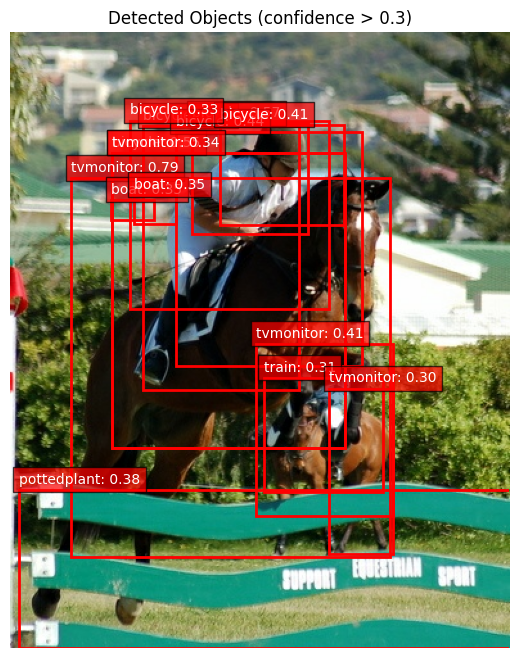


Testing with HIGH confidence threshold (0.7)


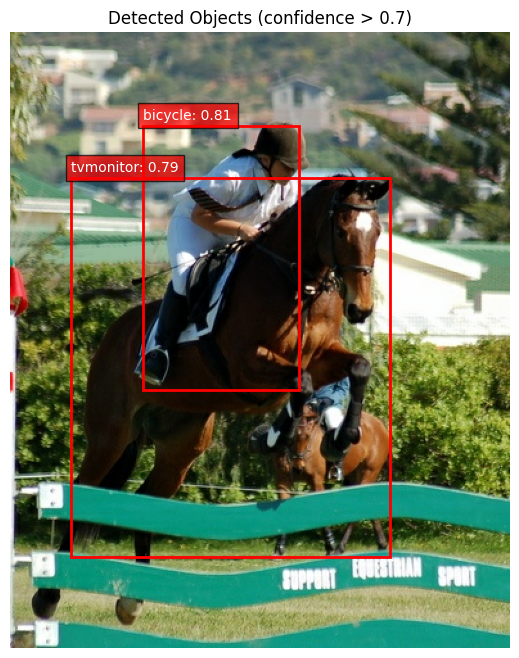

In [10]:
# Experiment with different confidence thresholds
print("Testing with LOW confidence threshold (0.3)")
for example in train_dataset.take(1):
    image = example["image"]
    detections = run_detector(detector, image)
    plot_detections(image, detections, class_names, threshold=0.3)

print("\nTesting with HIGH confidence threshold (0.7)")
for example in train_dataset.take(1):
    image = example["image"]
    detections = run_detector(detector, image)
    plot_detections(image, detections, class_names, threshold=0.7)

### Experiment 2: IoU Threshold

**Question:** How does the IoU threshold affect precision and recall?

**Try this:**
1. Run evaluation with iou_threshold=0.3 (lenient)
2. Run it again with iou_threshold=0.7 (strict)
3. Compare the precision and recall values

**Think about:**
- Lower IoU threshold → Easier to get true positives → Higher recall
- Higher IoU threshold → Harder to get true positives → Lower recall

In [11]:
# Experiment with different IoU thresholds
print("Evaluation with LENIENT IoU threshold (0.3)")
evaluate_model_performance(validation_dataset, detector, iou_threshold=0.3, num_samples=30)

print("\n" + "*"*50 + "\n")

print("Evaluation with STRICT IoU threshold (0.7)")
evaluate_model_performance(validation_dataset, detector, iou_threshold=0.7, num_samples=30)

Evaluation with LENIENT IoU threshold (0.3)
Evaluating on 30 images...

Model Performance (IoU Threshold = 0.30)
True Positives:     0 (correct detections)
False Positives:   99 (incorrect detections)
False Negatives:   61 (missed objects)
--------------------------------------------------
Precision: 0.00% (accuracy of detections)
Recall:    0.00% (coverage of actual objects)

**************************************************

Evaluation with STRICT IoU threshold (0.7)
Evaluating on 30 images...

Model Performance (IoU Threshold = 0.70)
True Positives:     0 (correct detections)
False Positives:   99 (incorrect detections)
False Negatives:   61 (missed objects)
--------------------------------------------------
Precision: 0.00% (accuracy of detections)
Recall:    0.00% (coverage of actual objects)


## 10. Reflection Questions

Please answer these questions in your lab journal. Include screenshots of your results where appropriate.

### Part 1: Conceptual Understanding

1. **Explain in your own words:** What is the difference between image classification and object detection?

2. **Bounding boxes:** Why do we use fractions (0 to 1) for bounding box coordinates instead of pixel values?

3. **IoU metric:** Explain what IoU measures. Why is an IoU of 0.5 commonly used as a threshold?

### Part 2: Implementation Experience

4. **Visualization function:** What was the most challenging part of implementing the `display_examples` or `plot_detections` function? How did you solve it?

5. **IoU calculation:** Walk through your IoU implementation. What would happen if you forgot to use `max(0, ...)` for the intersection width and height?

6. **Debugging:** Did you encounter any errors while coding? What was the error and how did you fix it?

### Part 3: Results Analysis

7. **Confidence threshold experiment:**
   - How many boxes did you see with threshold=0.3 vs threshold=0.7?
   - Which threshold do you think is better? Why?

8. **IoU threshold experiment:**
   - How did precision and recall change when you changed the IoU threshold?
   - Explain why this happened.

9. **Model errors:** Find one example each of:
   - A **false positive** (model detected something incorrectly)
   - A **false negative** (model missed an object)
   - Include screenshots and explain why you think the model made these errors.

### Part 4: Critical Thinking

10. **Precision vs Recall trade-off:**
    - For a self-driving car detecting pedestrians, would you prioritize high precision or high recall? Why?
    - For a photo app that tags objects in your pictures, would you prioritize high precision or high recall? Why?

11. **Pre-trained models:**
    - What are the advantages of using a pre-trained model?
    - What are the disadvantages?

12. **Real-world applications:** Name three real-world applications of object detection and explain why object detection (not just classification) is necessary for each.

### Part 5: Going Further (Optional - Bonus Points)

13. **F1 Score:** Research the F1 score metric. Implement a function to calculate it and add it to the evaluation. What does the F1 score tell you that precision and recall alone don't?

14. **Other models:** Research another object detection model (e.g., YOLO, Faster R-CNN). How does it differ from SSD MobileNet V2?

15. **Your own images:** Try running the detector on your own images (if possible). How well does it perform? What types of objects does it detect well vs poorly?

## Conclusion

Congratulations! You've completed Lab 06 on Object Detection.

### What you've learned:
- ✅ The difference between classification and detection
- ✅ How to work with bounding boxes
- ✅ How to use a pre-trained detection model
- ✅ How to visualize detection results
- ✅ How to calculate IoU from scratch
- ✅ How to evaluate model performance with precision and recall
- ✅ How different parameters affect model behavior

### Key takeaways:
1. **Object detection is harder than classification** because we need to find both what and where
2. **IoU is crucial** for measuring localization accuracy
3. **There's always a trade-off** between precision and recall
4. **No model is perfect** - understanding errors is important

### Next steps:
- Complete the reflection questions
- Experiment with different parameters
- Try the optional challenges
- Think about how you could apply object detection to solve real-world problems

**Great job! 🎉**